<a href="https://colab.research.google.com/github/reza-debug/Deep_learning_Projects/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#deep learning for heart disease data
#import data
#preprocess
#normalize
#model difine
#show history

# Load Dataset 📫

In [4]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocess ⚒

In [7]:
#set labels
X = df.drop('HeartDisease', axis='columns')
y = df['HeartDisease']

X.shape, y.shape


((918, 11), (918,))

In [8]:
#encoding non-number feature
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [9]:
#split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size= 0.2)

X_train.shape, X_test.shape

((734, 11), (184, 11))

In [10]:
X_train.iloc[0]

Age               27
Sex                1
ChestPainType      1
RestingBP         41
Cholesterol        0
FastingBS          0
RestingECG         2
MaxHR             76
ExerciseAngina     0
Oldpeak           12
ST_Slope           2
Name: 301, dtype: int64

In [11]:
#change data frame to array
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

X_train[0]

array([27,  1,  1, 41,  0,  0,  2, 76,  0, 12,  2])

In [14]:
#normalized range 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train[0], X_test[0]

(array([0.54166667, 1.        , 0.33333333, 0.62121212, 0.        ,
        0.        , 1.        , 0.64102564, 0.        , 0.23076923,
        1.        ]),
 array([0.58333333, 1.        , 0.        , 0.62121212, 0.22624434,
        0.        , 0.5       , 0.62393162, 0.        , 0.26923077,
        0.5       ]))

# Model Difination 🥟

In [36]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
#first layer ofter input
model.add( keras.layers.Input( shape=(11,) ) )
#Hidden layers
model.add( keras.layers.Dense( units=128, activation= 'relu' ) )
model.add( keras.layers.Dense( units=128, activation= 'relu' ) )

#drop out layer (Turn Off Nurons 50%)
model.add(keras.layers.Dropout(0.5))

model.add( keras.layers.Dense( units=128, activation= 'relu' ) )
model.add( keras.layers.Dense( units=128, activation= 'relu' ) )
#output layer
model.add( keras.layers.Dense( units=1, activation= 'sigmoid' ) )

#compile
model.compile( optimizer = 'adam' , loss = tf.losses.binary_crossentropy , metrics=['accuracy'] )

In [37]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 128)               1536      
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 1)                 129       
                                                                 
Total params: 51201 (200.00 KB)
Trainable params: 512

In [40]:
#Train Model
hist = model.fit ( X_train,y_train, epochs=200, batch_size=128, validation_data= (X_test,y_test) )

Epoch 1/200
6/6 [==============================] - 5s 70ms/step - loss: 0.6671 - accuracy: 0.6689 - val_loss: 0.6204 - val_accuracy: 0.7717
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5898 - accuracy: 0.7861 - val_loss: 0.5019 - val_accuracy: 0.8315
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4730 - accuracy: 0.8202 - val_loss: 0.4050 - val_accuracy: 0.8478
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4180 - accuracy: 0.8338 - val_loss: 0.4030 - val_accuracy: 0.8478
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4072 - accuracy: 0.8283 - val_loss: 0.4005 - val_accuracy: 0.8533
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3897 - accuracy: 0.8392 - val_loss: 0.3951 - val_accuracy: 0.8370
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.3676 - accuracy: 0.8569 - val_loss: 0.3981 - val_accuracy: 0.8207
Epoch 8/200
6/6 [===

# Visualize 〽

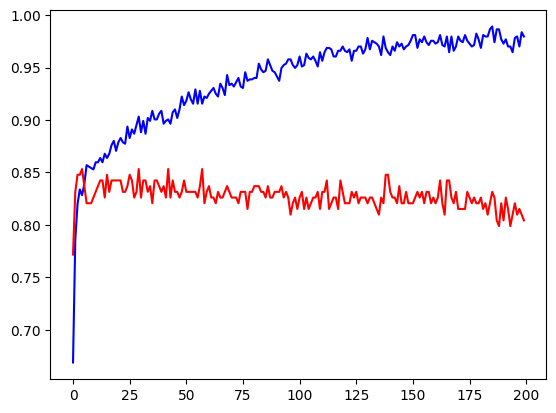

In [44]:
import matplotlib.pyplot as plt
#train plot
plt.plot(hist.history['accuracy'],color='blue')
#test plot
plt.plot(hist.history['val_accuracy'],color='red')


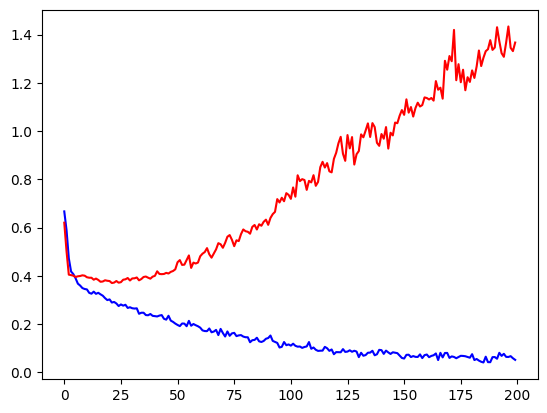

In [45]:
#train plot
plt.plot(hist.history['loss'],color='blue')
#test plot
plt.plot(hist.history['val_loss'],color='red')